In [ ]:
import numpy as np
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/Neha-Chiluka/deeplearning/refs/heads/main/tensorflow/data/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2013,white,6.6,0.32,0.22,16.7,0.046,38.0,133.0,0.99790,3.22,0.67,10.4,6
2526,white,6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,7
2271,white,6.7,0.25,0.26,13.5,0.060,50.0,156.0,0.99784,3.39,0.46,9.9,6
2249,white,6.3,0.27,0.18,7.7,0.048,45.0,186.0,0.99620,3.23,0.47,9.0,5
1537,white,8.1,0.28,0.49,1.0,0.040,32.0,148.0,0.99360,3.13,0.41,10.0,6


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

In [ ]:
# Get the count of wines by quality grade
quality_counts = df['quality'].value_counts().sort_index(ascending=True)

# Display the result
print(quality_counts)


quality
3      30
4     214
5    2128
6    2820
7    1074
8     192
9       5
Name: count, dtype: int64


In [ ]:
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    # Use learning_rate instead of lr
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6627 - loss: 0.8206 - precision: 0.7175 - recall: 0.7719
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7263 - loss: 0.5632 - precision: 0.7672 - recall: 0.8204
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7464 - loss: 0.5071 - precision: 0.7915 - recall: 0.8180
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7564 - loss: 0.5061 - precision: 0.7854 - recall: 0.8496
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7618 - loss: 0.4943 - precision: 0.8020 - recall: 0.8319
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7660 - loss: 0.5035 - precision: 0.7953 - recall: 0.8522
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7559 - loss: 0.4951 - precision: 0.7833 - recall: 0.8529
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7667 - loss: 0.4876 - precision: 0.8054 - recall: 0.8357
Epoch 9/

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

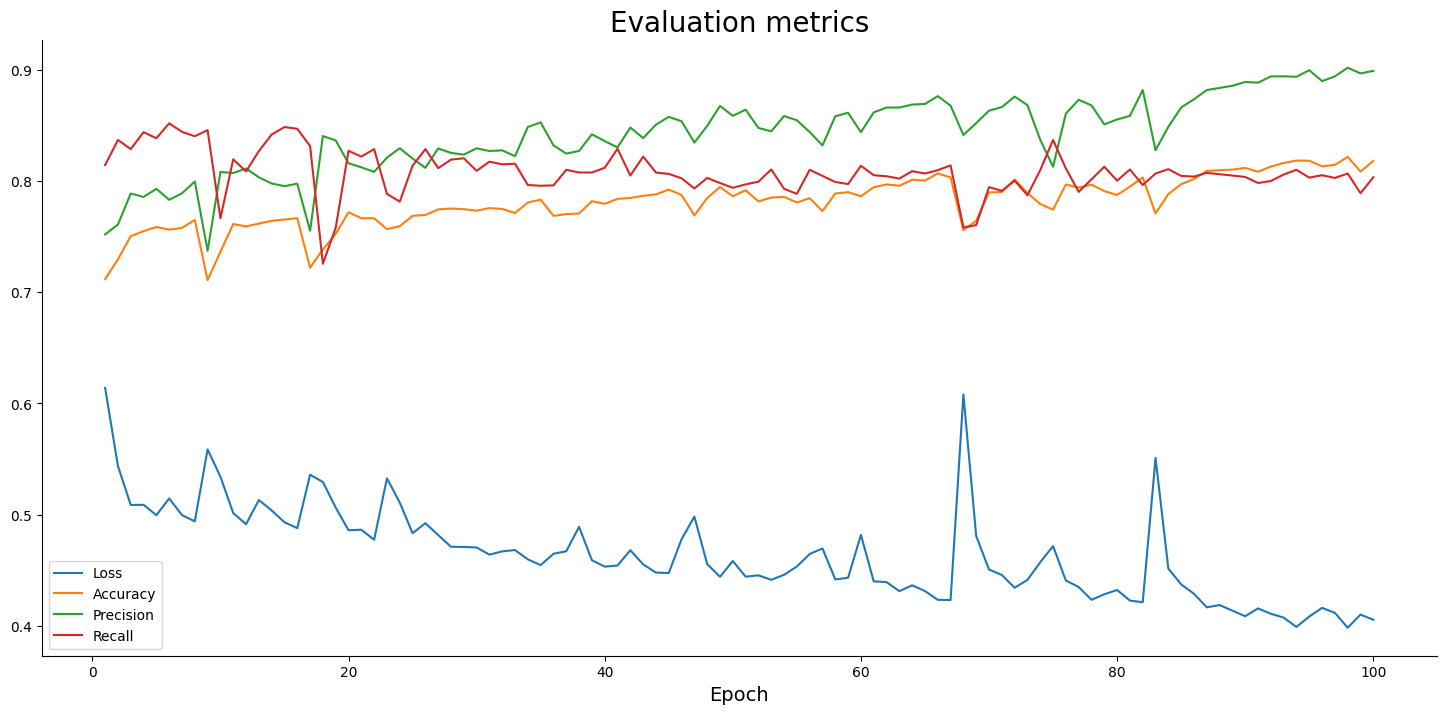

In [ ]:
plt.plot(
    np.arange(1, 101),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)
print(predictions)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[0.5208018 ]
 [0.5682578 ]
 [0.44114602]
 ...
 [0.9660784 ]
 [0.23775794]
 [0.23775794]]


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[366 116]
 [172 639]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.78
Precision: 0.85
Recall: 0.79
